In [ ]:
import pandas as pd
import numpy as np 
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df =  pd.read_csv('/Users/markantepenko/CaseStudies/fraud_detection/data/creditcard_2023.csv')

In [2]:
X = df.drop(['id','Class'], axis=1, errors='ignore')
y = df['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)    

rf = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    min_samples_split=5,
    random_state=42
) 

cv_scores = cross_val_score(rf,X_train_scaled, y_train, cv=5, scoring='f1')
print("\nCross-validation F1 scores:", cv_scores)
print("Average F1 score:", np.mean(cv_scores))

rf.fit(X_train_scaled, y_train)
y_pred = rf.predict(X_test_scaled)

print(classification_report(y_test, y_pred))


Cross-validation F1 scores: [0.98470321 0.98644528 0.98474499 0.98431399 0.98388321]
Average F1 score: 0.9848181344566076
              precision    recall  f1-score   support

           0       0.97      1.00      0.99     56750
           1       1.00      0.97      0.99     56976

    accuracy                           0.99    113726
   macro avg       0.99      0.99      0.99    113726
weighted avg       0.99      0.99      0.99    113726



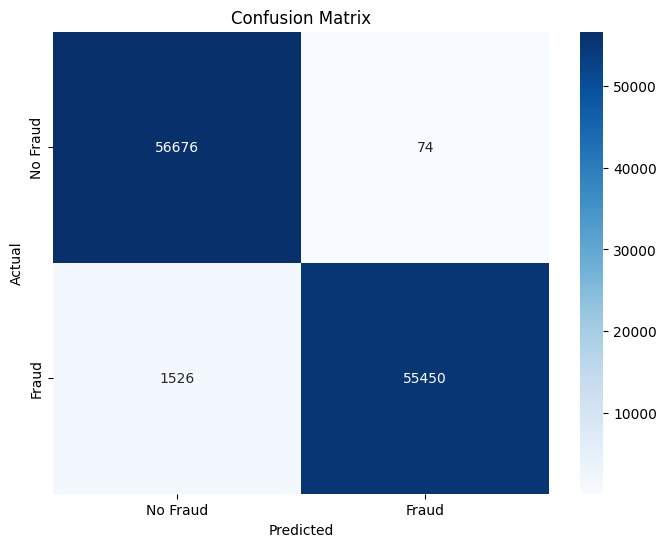

,Feature,Importance
0,V1,0.006119
1,V2,0.021027
2,V3,0.035553
3,V4,0.159136
4,V5,0.008126


In [ ]:
plt.figure(figsize=(8,6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Fraud', 'Fraud'], yticklabels=['No Fraud', 'Fraud'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

In [9]:
importances = rf.feature_importances_
feature_imp = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances   
})
feature_imp.head()

,Feature,Importance
0,V1,0.006119
1,V2,0.021027
2,V3,0.035553
3,V4,0.159136
4,V5,0.008126


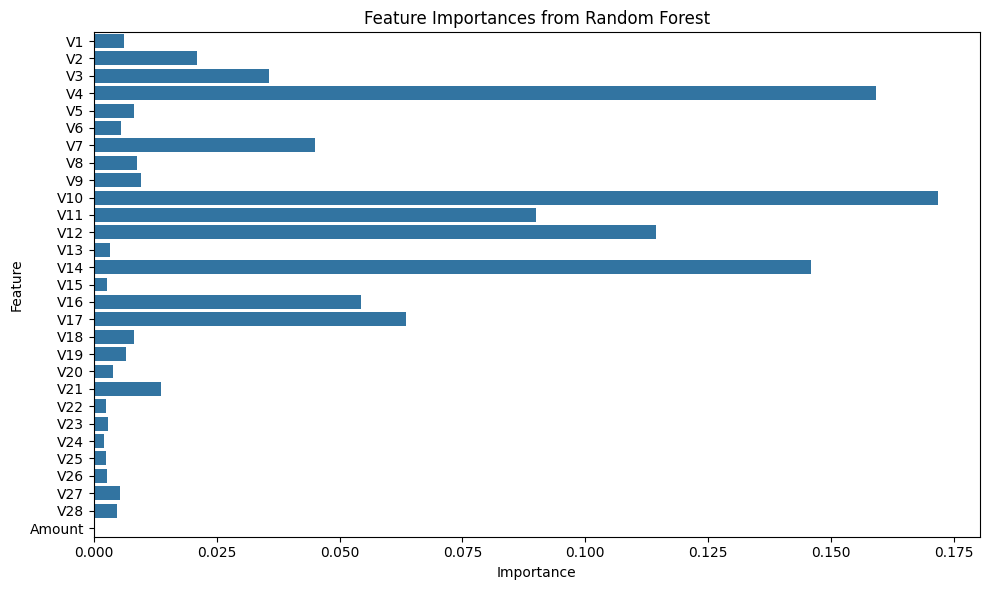

In [10]:
plt.figure(figsize=(10,6))
sns.barplot(data=feature_imp, x='Importance', y='Feature')
plt.title('Feature Importances from Random Forest')
plt.xlabel('Importance')
plt.tight_layout()
plt.show()

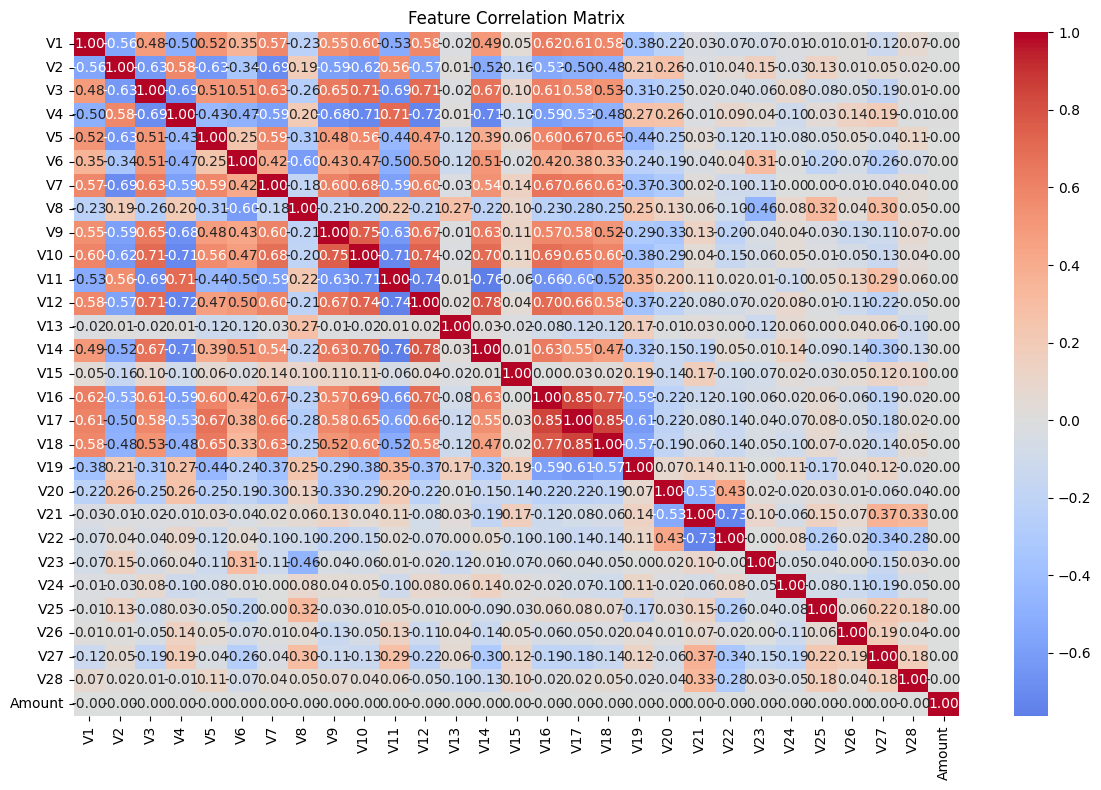

In [11]:
plt.figure(figsize=(12,8))
correlation_matrix = X.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Feature Correlation Matrix')
plt.tight_layout()
plt.show()

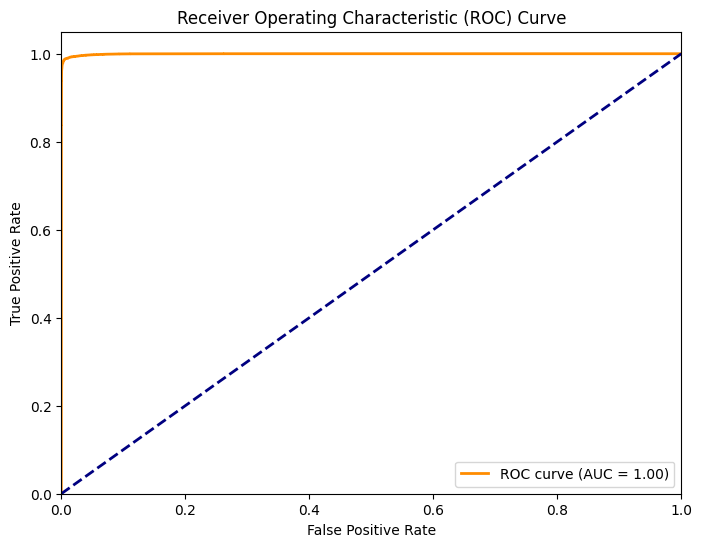

In [12]:
y_pred_proba = rf.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1] , color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()